In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline



from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv("plant_growth_data.csv")

In [3]:
df.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0


In [4]:
df=df.rename(columns={"Growth_Milestone":"class"})

CLASS is "Growth_Milestone"

In [5]:
df.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,class
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0


In [6]:
max(df['Humidity'])


79.64823980596502

In [7]:
min(df['Humidity'])

30.567682238370956

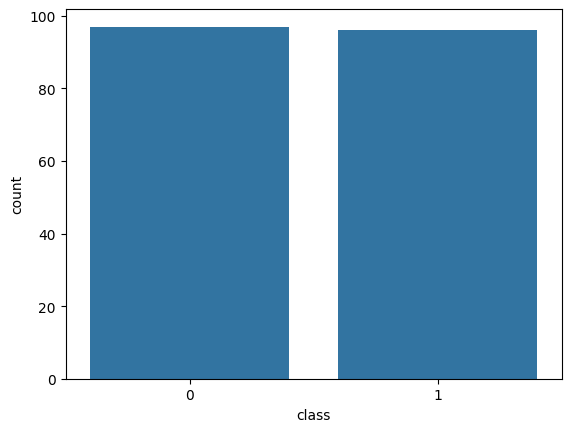

In [8]:
x = df['class']
ax = sns.countplot(x=x, data=df)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Soil_Type        193 non-null    object 
 1   Sunlight_Hours   193 non-null    float64
 2   Water_Frequency  193 non-null    object 
 3   Fertilizer_Type  193 non-null    object 
 4   Temperature      193 non-null    float64
 5   Humidity         193 non-null    float64
 6   class            193 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 10.7+ KB


soil,water,fertilizer --> objects
sunlight,temp,humidity-->numeric

In [10]:
for col in df.columns:
    print(f"{col}: {df[col].isnull().sum() }")

Soil_Type: 0
Sunlight_Hours: 0
Water_Frequency: 0
Fertilizer_Type: 0
Temperature: 0
Humidity: 0
class: 0


In [11]:
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])

In [12]:
df.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,class
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0


In [13]:
y = df['class'].values.reshape(-1,1)

In [14]:
x = df.drop(['class'],axis=1)
x

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861
1,sandy,4.033133,weekly,organic,28.919484,52.422276
2,loam,8.892769,bi-weekly,none,23.179059,44.660539
3,loam,8.241144,bi-weekly,none,18.465886,46.433227
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923
...,...,...,...,...,...,...
188,sandy,5.652000,daily,none,28.000000,70.200000
189,clay,7.528000,weekly,chemical,30.500000,60.100000
190,loam,4.934000,bi-weekly,none,24.500000,61.700000
191,sandy,8.273000,daily,organic,27.900000,69.500000


In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


categorical_features = ['Soil_Type', 'Water_Frequency', 'Fertilizer_Type']
numerical_features = ['Sunlight_Hours', 'Temperature', 'Humidity']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

NAIVE BAYES

In [16]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)
model.fit(x_train,y_train)

c:\Users\ASUS\anaconda3\envs\streamlitenv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Sunlight_Hours',
                                                   'Temperature', 'Humidity']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Soil_Type',
                                                   'Water_Frequency',
                                                   'Fertilizer_Type'])])),
                ('classifier', GaussianNB())])

In [18]:
y_pred = model.predict(x_test)

In [19]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix


In [20]:
print( '  Accuracy : %.2f' % accuracy_score(y_test,y_pred))

  Accuracy : 0.69


In [21]:
tp, fp, fn, tn = confusion_matrix(y_test, y_pred).ravel()
cf =confusion_matrix(y_test, y_pred)
cf

array([[16,  8],
       [ 4, 11]])

In [22]:
(tp, fp, fn, tn)

(np.int64(16), np.int64(8), np.int64(4), np.int64(11))

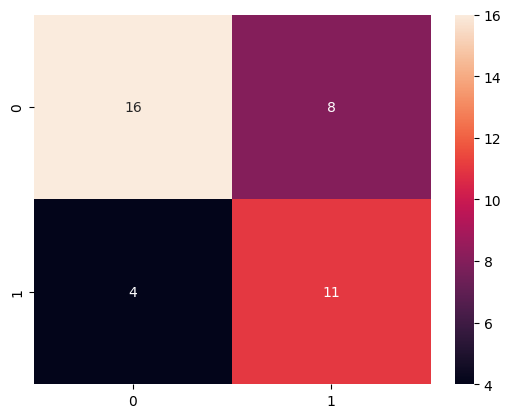

Accuracy: 0.6923076923076923
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        24
           1       0.58      0.73      0.65        15

    accuracy                           0.69        39
   macro avg       0.69      0.70      0.69        39
weighted avg       0.71      0.69      0.70        39



In [23]:
cf_matrix_NB = confusion_matrix(y_test, y_pred).astype(int)
sns.heatmap(cf_matrix_NB,fmt="d", annot=True)
plt.show()


print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=10))
])

In [26]:
model.fit(x_train,y_train)

c:\Users\ASUS\anaconda3\envs\streamlitenv\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Sunlight_Hours',
                                                   'Temperature', 'Humidity']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Soil_Type',
                                                   'Water_Frequency',
                                                   'Fertilizer_Type'])])),
                ('classifier', KNeighborsClassifier(n_neighbors=10))])

In [27]:
y_pred = model.predict(x_test)

In [28]:
print( '  Accuracy : %.2f' % accuracy_score(y_test,y_pred))

  Accuracy : 0.74


In [29]:
tp, fp, fn, tn = confusion_matrix(y_test, y_pred).ravel()
cf =confusion_matrix(y_test, y_pred)
cf

array([[16,  8],
       [ 2, 13]])

In [30]:
(tp, fp, fn, tn)

(np.int64(16), np.int64(8), np.int64(2), np.int64(13))

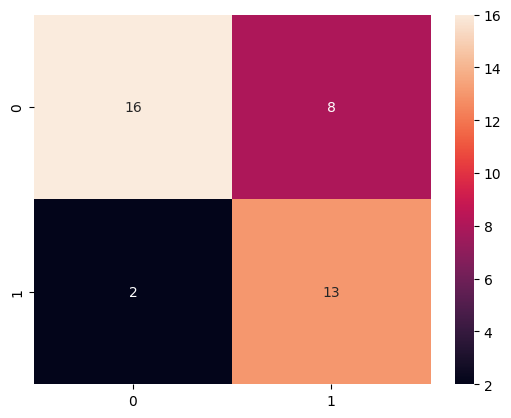

Accuracy: 0.7435897435897436
              precision    recall  f1-score   support

           0       0.89      0.67      0.76        24
           1       0.62      0.87      0.72        15

    accuracy                           0.74        39
   macro avg       0.75      0.77      0.74        39
weighted avg       0.79      0.74      0.75        39



In [31]:
cf_matrix_KNN = confusion_matrix(y_test, y_pred).astype(int)
sns.heatmap(cf_matrix_KNN,fmt="d", annot=True)
plt.show()


print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

LOGISTIC REGRESSION

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [34]:
model.fit(x_train,y_train)

c:\Users\ASUS\anaconda3\envs\streamlitenv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Sunlight_Hours',
                                                   'Temperature', 'Humidity']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Soil_Type',
                                                   'Water_Frequency',
                                                   'Fertilizer_Type'])])),
                ('classifier', LogisticRegression())])

In [35]:
import pickle

In [36]:
with open('model2.pkl', 'wb') as f:
    pickle.dump(model, f)

In [37]:
y_pred = model.predict(x_test)

In [38]:
print( '  Accuracy : %.2f' % accuracy_score(y_test,y_pred))

  Accuracy : 0.64


In [39]:
tp, fp, fn, tn = confusion_matrix(y_test, y_pred).ravel()
cf =confusion_matrix(y_test, y_pred)
cf

array([[15,  9],
       [ 5, 10]])

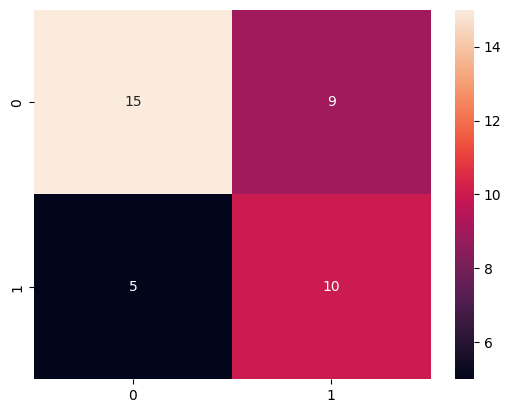

Accuracy: 0.6410256410256411
              precision    recall  f1-score   support

           0       0.75      0.62      0.68        24
           1       0.53      0.67      0.59        15

    accuracy                           0.64        39
   macro avg       0.64      0.65      0.64        39
weighted avg       0.66      0.64      0.65        39



In [40]:
cf_matrix_LGR = confusion_matrix(y_test, y_pred).astype(int)
sns.heatmap(cf_matrix_LGR,fmt="d", annot=True)
plt.show()


print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

In [42]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

In [43]:
with open('model3.pkl', 'wb') as f:
    pickle.dump(model, f)